In [3]:
from matplotlib import pyplot as plt
from skimage import io
import cv2
import numpy as np

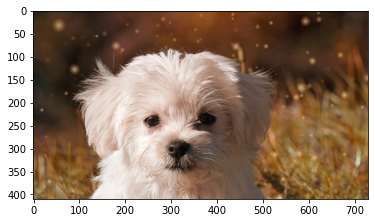

In [4]:
img = io.imread('../cachorro.jpg')
plt.imshow(img)

In [3]:
def rgb_para_hsv(r, g, b):
    r, g, b = r/255.0, g/255.0, b/255.0
    mx, mn = max(r, g, b), min(r, g, b)
    dif = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g-b)/dif) + 360) % 360
    elif mx == g:
        h = (60 * ((b-r)/dif) + 120) % 360
    elif mx == b:
        h = (60 * ((r-g)/dif) + 240) % 360
    if mx == 0:
        s = 0
    else:
        s = (dif/mx)*100
    v = mx*100
    return h, s, v

rgb_para_hsv(23, 51, 34)


(143.57142857142856, 54.90196078431373, 20.0)

In [36]:
from math import acos, sqrt, pi

def rgb_para_hsi(r, g, b):
    r, g, b = r/255.0, g/255.0, b/255.0
    numi=((r-g)+(r-b))/2
    denom= sqrt((r-g)**2+((r-b)*(g-b)))
    h = acos(numi/denom)*180/pi
    if b > g:
        h = 360 - h
    
    s = 1-(3)*min(r, g, b)/(r+g+b)
    i = (r+g+b)/3
    return [h, s, i]
print(rgb_para_hsi(30, 45, 50))

[193.89788624801395, 0.28000000000000014, 0.16339869281045752]


Text(0.5, 1.0, 'blue')

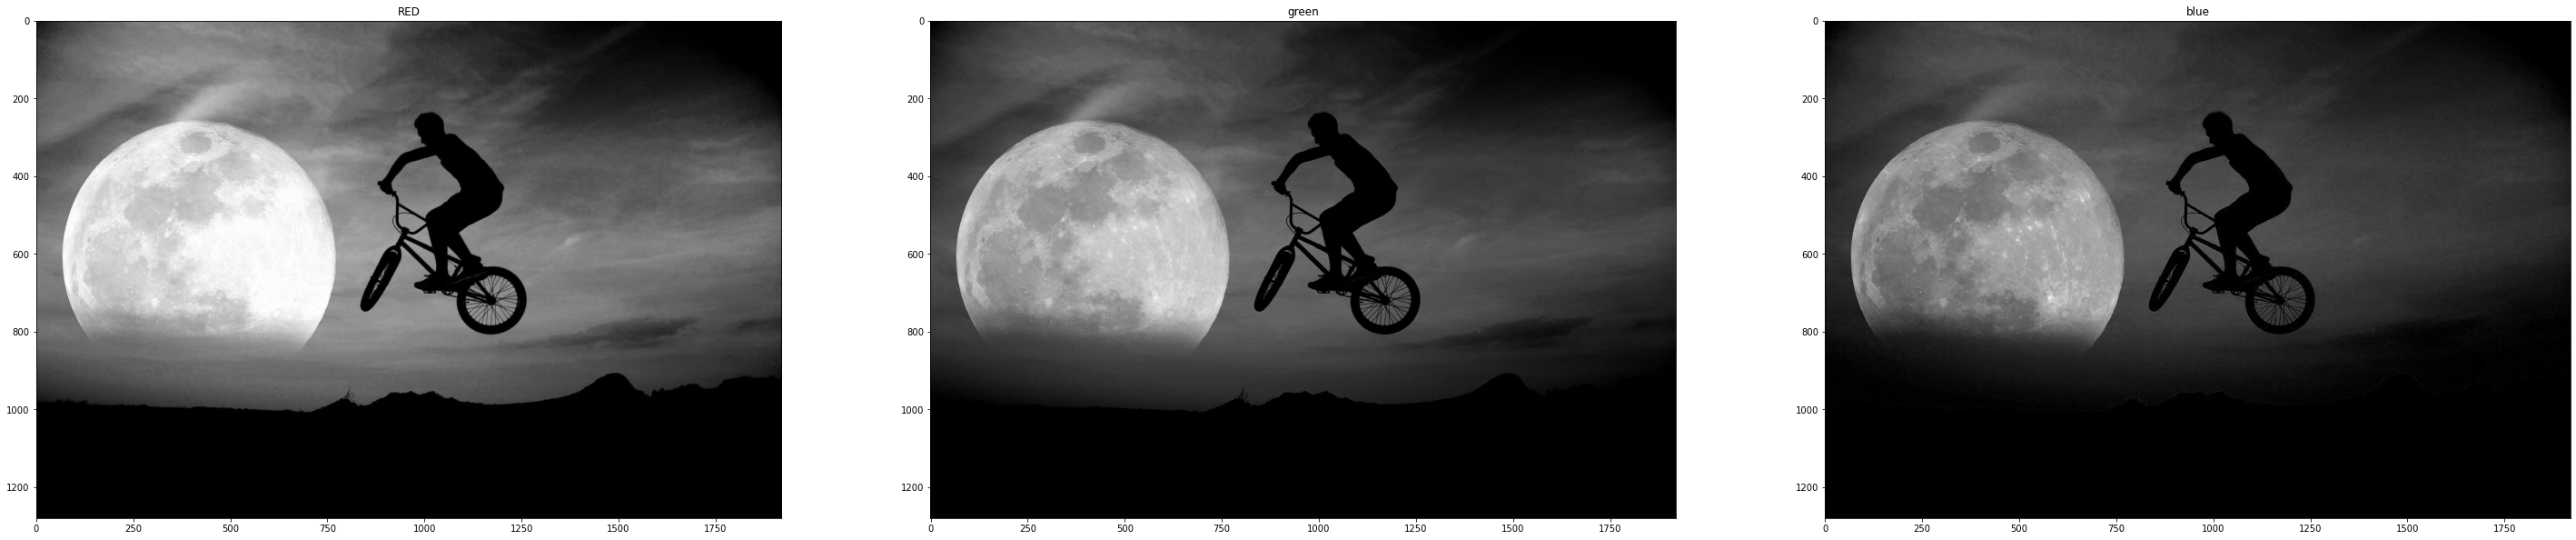

In [15]:
# Canais
r = img[..., 0]
g = img[..., 1]
b = img[..., 2]

# Inicializando a plotagem
f, axes = plt.subplots(1, 3, figsize=(50, 25))

# Configurando os eixos
(ax_r, ax_g, ax_b) = axes

ax_r.imshow(r, cmap='gray')
ax_r.set_title('RED')

ax_g.imshow(g, cmap='gray')
ax_g.set_title('green')

ax_b.imshow(b, cmap='gray')
ax_b.set_title('blue')

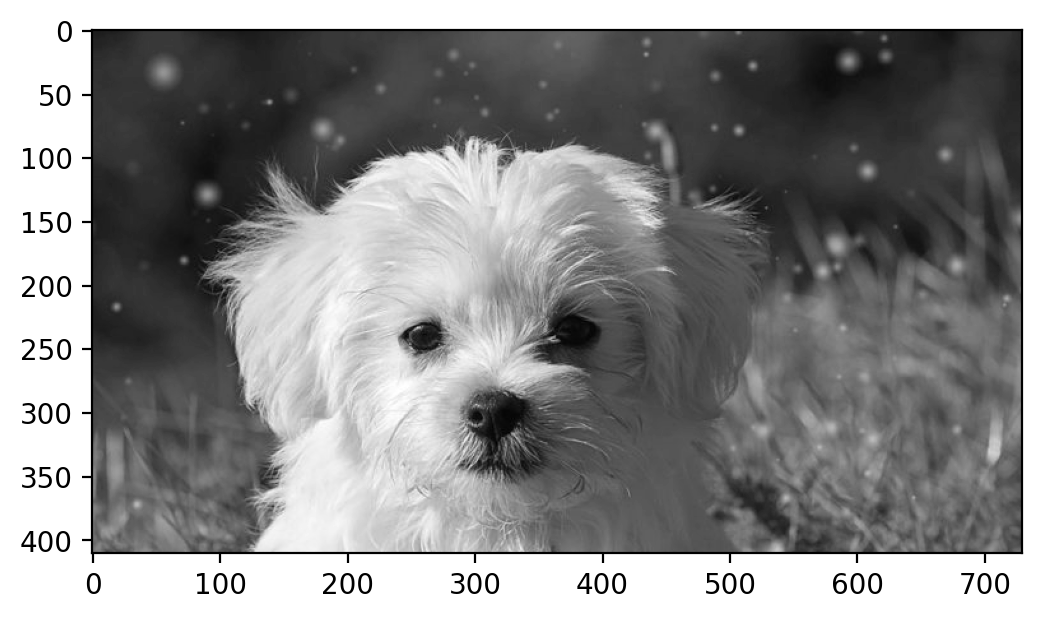

In [9]:
def escalaDeCinza(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.299 * r + 0.587 * g + 0.114 * b

    return gray
img_gray = escalaDeCinza(img)
plt.imshow(img_gray, cmap='gray')

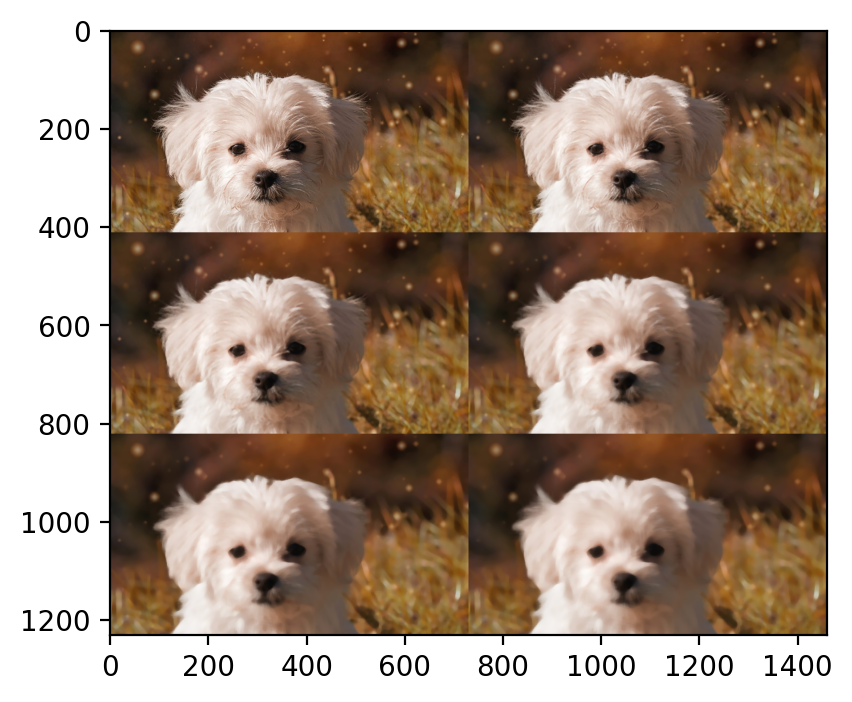

In [6]:

mediana = np.vstack([np.hstack([img,cv2.medianBlur(img,  3)]), 
  np.hstack([cv2.medianBlur(img,  5), cv2.medianBlur(img,  7)]), 
  np.hstack([cv2.medianBlur(img,  9), cv2.medianBlur(img, 11)]), ])
plt.rcParams['figure.dpi'] = 200
plt.imshow(mediana)


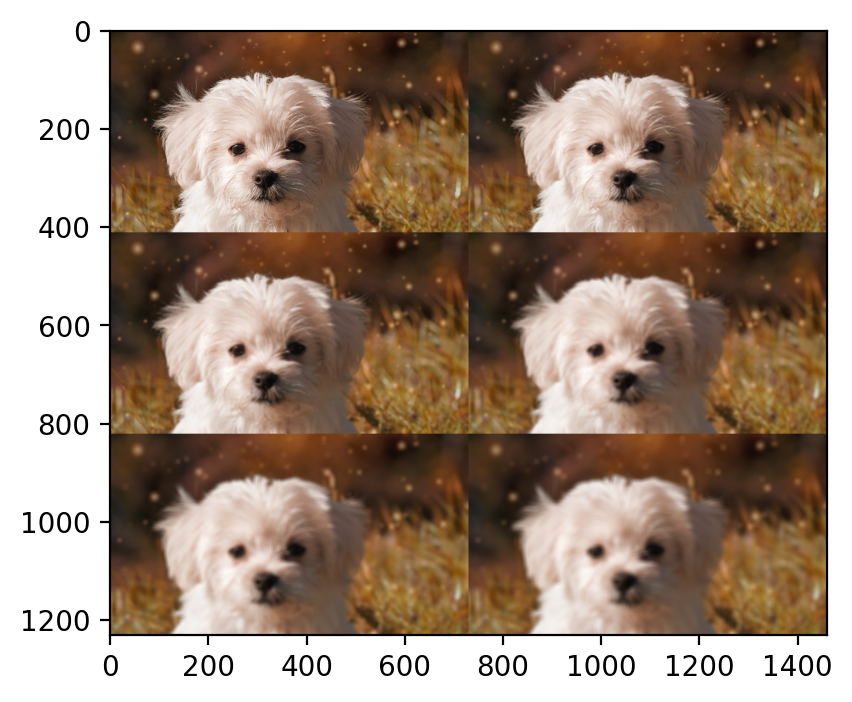

In [7]:
media = np.vstack([np.hstack([img, cv2.blur(img, ( 3,  3))]), 
                   np.hstack([cv2.blur(img, (5,5)), cv2.blur(img, ( 7,  7))]), 
                   np.hstack([cv2.blur(img, (9,9)), cv2.blur(img, (11, 11))]), ])
plt.rcParams['figure.dpi'] = 200
plt.imshow(media)

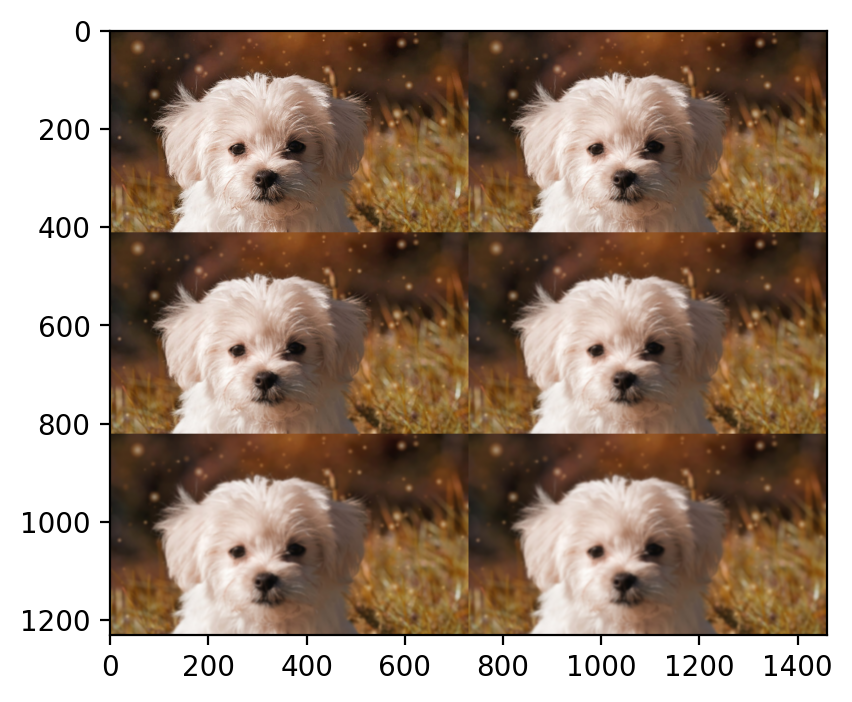

In [8]:
ponderada = np.vstack([np.hstack([img,cv2.GaussianBlur(img, ( 3,  3), 0)]), 
                   np.hstack([cv2.GaussianBlur(img, ( 5,  5), 0), 
                              cv2.GaussianBlur(img, ( 7,  7), 0)]), 
                   np.hstack([cv2.GaussianBlur(img, ( 9,  9), 0), 
                              cv2.GaussianBlur(img, (11, 11), 0)]), ])
plt.rcParams['figure.dpi'] = 200
plt.imshow(ponderada)

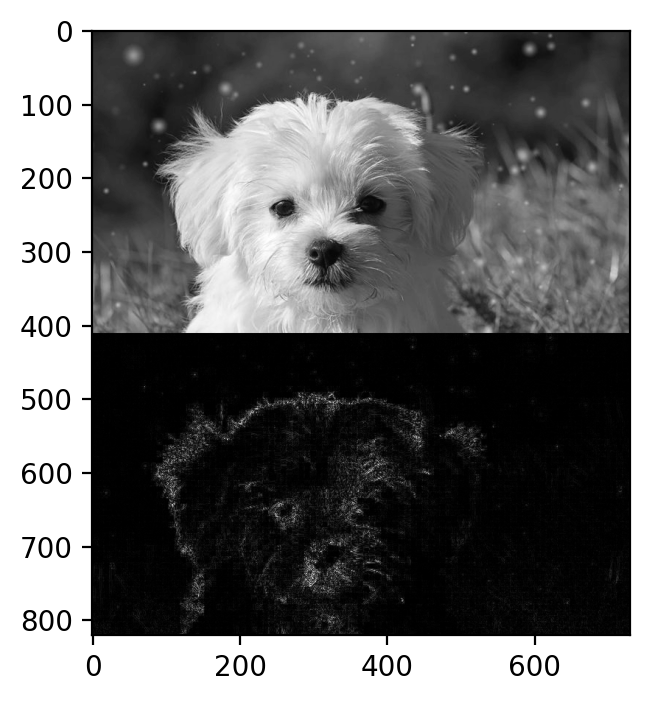

In [11]:
img_gray = escalaDeCinza(img)
lap = cv2.Laplacian(img_gray, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
resultado = np.vstack([img_gray, lap])
plt.imshow(resultado, cmap="gray")